# Проект по интернет-магазину «Стримчик» <a id='intro'></a>
**Задача проекта:**

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

**Описание данных:**

Таблица games:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

**План проекта:**
1) Изучить общую информацию о данных

2) Подготовить данные для анализа, а именно:
  * Привести названия столбцов к единому виду 
  * Где нужно изенить тип данных 
  * Обработать пропуски
  * Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
  
3) Провести исследовательский анализ данных
  * Посмотреть, сколько игр выпускалось в разные годы
  * Посмотреть, как менялись продажи по платформам
  * Выбрать акутальный период 
  * Выберать несколько потенциально прибыльных платформ
  * Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
  * Посмотреть на общее распределение игр по жанрам
  
4) Составьте портрет пользователя каждого региона, те для каждого региона (NA, EU, JP) выявить:
  * Самые популярные платформы (топ-5)
  * Самые популярные жанры (топ-5)
  
  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

  
5) Проверить гипотезы:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  * Средние пользовательские рейтинги жанров Action и Sports разные
  
6) Сделать общие выводы 




## Общая информация

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
number_old=data.shape[0]
print(number_old)

16715


**Вывод:** в таблице всего 16715 строк. Заметно, что больше всего пропущено строк в трех последних столбцах, гд еотображен рейтинг и оценки критиков и пользователей. Также видно, что все столбцы названы неправильно и у некоторых неправильный тип данных. 


## Предоработка данных 

In [6]:
print(data.columns)
for name in data.columns:
    data=data.rename(columns={name:name.lower()})
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Пояснение:** пропуски в столбце name никак не повлияют на дальнейший анализ, к тому же их всего два, так что заменим их на unknown. А вот пропуски в столбце genre уже будут задействованы в анализе, так что их проще удалить. Так как в дальнейшем анализе будем очень много смотреть на то, в каком году была выпущена, мне кажется, что строчки с пропусками в столбце Year_of_Release можно убрать, к тому же это меньше 2% от всех данных. пропуски в стоблце rating попробуем заменить на unknown. А вот удалить строчки с пропусками в столбцах critic_score и user_score или заменить их какие-то значения без послетствий не получится, так что оставим их. 

In [8]:
data=data.dropna(subset=['genre'])
data=data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
round(100-(data.shape[0]/number_old)*100)

2

**Пояснение:** другими словами, мы потеряли лишь 2% данных, что приемлемо 

In [10]:
data['year_of_release']=data['year_of_release'].astype(int)

In [11]:
data['user_score'].sort_values().unique()
#data['user_score']=data['user_score'].astype(float)

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

**Пояснение:** аббревиатура 'tbd' означает 'будет определен позднее', те получается, что рейтинг у такой игры был еще не определен, следовательно можно его заполнить пропуском. И после этого заменить тип данных в этом столбце на числовой. 

In [12]:
data.loc[data['user_score']=='tbd', 'user_score']=np.nan
data['user_score']=data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Заменим пропуски в столбце rating на unknown, так как мне кажется, что в большинстве своем пропуски будут у игр, выпущенных где-то не в США, ведь рейтинг американский. А игры, выпущенные, например, в Японии будут и продаваться хорошо в Японии. Так что пропуски могут повлиять на 4 пункт анализа.

In [14]:
data['rating']=data['rating'].fillna('unknown')

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

In [16]:
data.year_of_release.value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


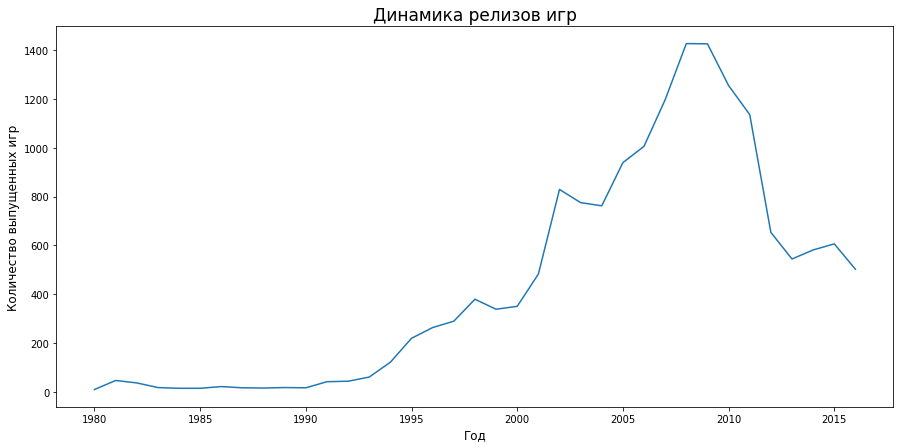

In [17]:
plt.figure(figsize=(15, 7))

data.groupby('year_of_release')['name'].count().plot()

plt.title('Динамика релизов игр', size=17)
plt.xlabel('Год',size=12)
plt.ylabel('Количество выпущенных игр', size=12)
plt.show()

In [18]:
data_platform=data.groupby('platform').agg({'sum_sales':'sum'})
data_platform.columns=['sum_of_sum_sales']
data_platform.sort_values(by='sum_of_sum_sales', ascending=False)

,sum_of_sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


**Пояснение:** Мне кажется, тут есть смысл рассматривать распределение продаж по годам у первых 6 платформах, так как продажи на 7-ой платформе меньше почти в 2 раза продаж на 6-ой платформе. 

In [19]:
platform_top6=["PS2","X360","PS3","Wii","DS","PS"]
data_platform_top6=data.query('platform in @platform_top6').groupby(['platform','year_of_release']).agg({'sum_sales':'sum'})


In [20]:
data_merged=data_platform_top6.join(data_platform_top6.index.to_frame())

In [21]:
display(data_merged)

sum_sales platform  year_of_release
platform year_of_release                                     
DS       1985                  0.02       DS             1985
         2004                 17.27       DS             2004
         2005                130.14       DS             2005
         2006                119.81       DS             2006
         2007                146.94       DS             2007
...                             ...      ...              ...
X360     2012                 99.74     X360             2012
         2013                 88.58     X360             2013
         2014                 34.74     X360             2014
         2015                 11.96     X360             2015
         2016                  1.52     X360             2016

[67 rows x 3 columns]

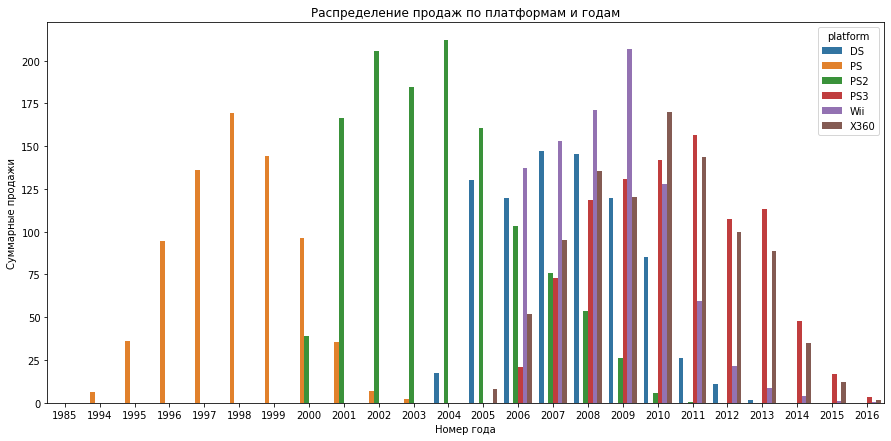

In [22]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(x='year_of_release',
            y='sum_sales',
            hue="platform",
            data=data_merged,
            
)
ax.set_title('Распределение продаж по платформам и годам')
ax.set(xlabel='Номер года', ylabel='Суммарные продажи');

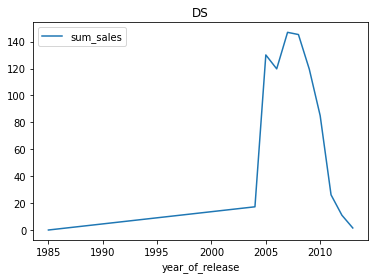

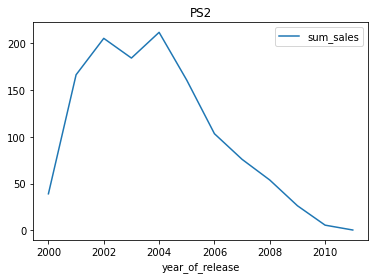

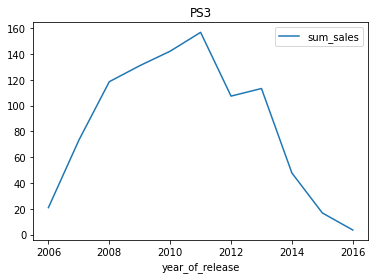

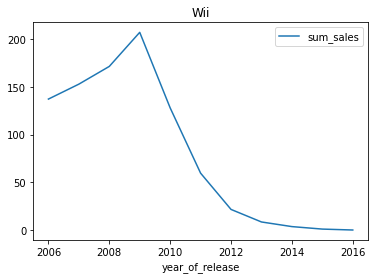

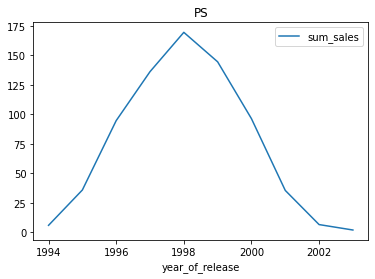

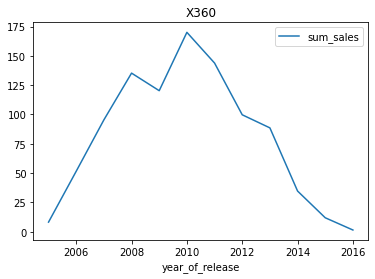

In [23]:
data_merged.query('platform == "DS"').plot(x='year_of_release',
            y='sum_sales', title='DS');
data_merged.query('platform == "PS2"').plot(x='year_of_release',
            y='sum_sales', title='PS2');
data_merged.query('platform == "PS3"').plot(x='year_of_release',
            y='sum_sales', title='PS3');
data_merged.query('platform == "Wii"').plot(x='year_of_release',
            y='sum_sales', title='Wii');
data_merged.query('platform == "PS"').plot(x='year_of_release',
            y='sum_sales', title='PS');
data_merged.query('platform == "X360"').plot(x='year_of_release',
            y='sum_sales', title='X360');

**Поянение:** а теперь для наглядности поменим все на один график.

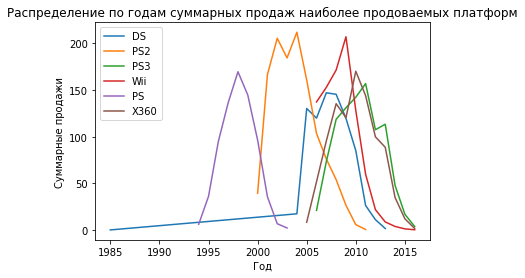

In [24]:
plt.plot('year_of_release', 'sum_sales', data=data_merged.query('platform == "DS"'), label ='DS')
plt.plot('year_of_release', 'sum_sales',data=data_merged.query('platform == "PS2"'), label ='PS2')
plt.plot('year_of_release', 'sum_sales', data=data_merged.query('platform == "PS3"'), label ='PS3')
plt.plot('year_of_release', 'sum_sales',data=data_merged.query('platform == "Wii"'), label ='Wii')
plt.plot('year_of_release', 'sum_sales', data=data_merged.query('platform == "PS"'), label ='PS')
plt.plot('year_of_release', 'sum_sales',data=data_merged.query('platform == "X360"'), label ='X360')

plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.legend()
plt.title('Распределение по годам суммарных продаж наиболее продоваемых платформ')
plt.show()


**Пояснение:** в основном жизненный цикл платформы составляет 10 лет. Другими словами, проходит 10 лет от возникновения платформы до ее исчезновения. 

**Вывод:** Если основной жизненный цикл платформы составляет 10 лет, то для того, чтобы построить прогноз на 2017 год, лучше смотреть данные по платформам, которые имееют хоть какие-то продажи в 2016 году и за несколько лет до. Таким образом, мы сможем отсеять и самые начальные года, где было очень мало суммарных продаж и маленькое количсетво выпущенных игр, и те платформы, которые уже исчезли

In [25]:
platform_names=[]
for name in data['platform'].sort_values().unique():
    if data.loc[data['platform']==name]['year_of_release'].max() == 2016:
        platform_names.append(name)
print(platform_names)   


['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


In [26]:
data_grouped=data.query('platform in @platform_names').groupby(['platform','year_of_release']).agg({'sum_sales':'sum'})
data_grouped_merged=data_grouped.join(data_grouped.index.to_frame())
display(data_grouped_merged.head(20)) 


sum_sales platform  year_of_release
platform year_of_release                                     
3DS      2011                 63.20      3DS             2011
         2012                 51.36      3DS             2012
         2013                 56.57      3DS             2013
         2014                 43.76      3DS             2014
         2015                 27.78      3DS             2015
         2016                 15.14      3DS             2016
PC       1985                  0.04       PC             1985
         1988                  0.03       PC             1988
         1992                  3.03       PC             1992
         1994                 12.87       PC             1994
         1995                  4.22       PC             1995
         1996                 10.58       PC             1996
         1997                 11.27       PC             1997
         1998                  3.26       PC             1998
         1999                  4.74       PC             1999
         2000                  4.66       PC             2000
         2001                  5.47       PC             2001
         2002                  8.57       PC             2002
         2003                  8.84       PC             2003
         2004                 10.39       PC             2004

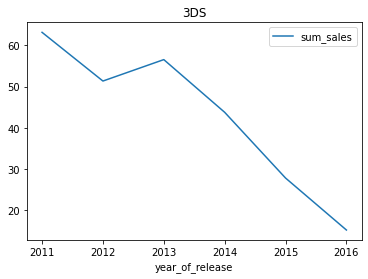

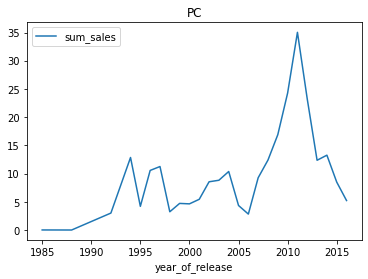

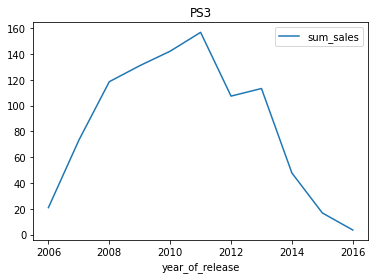

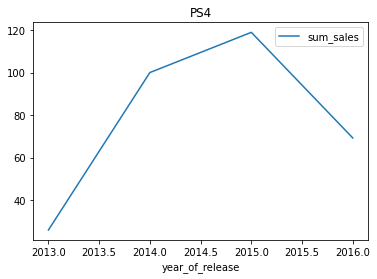

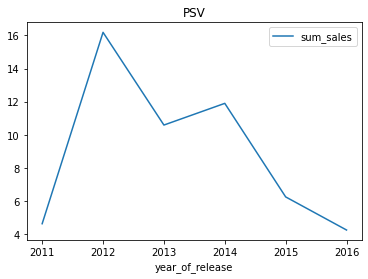

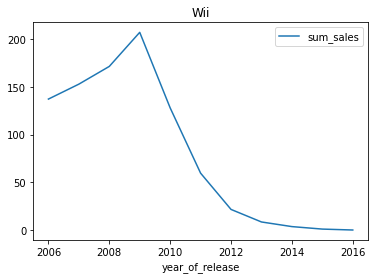

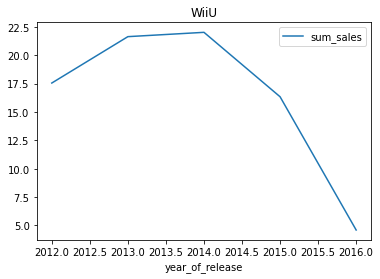

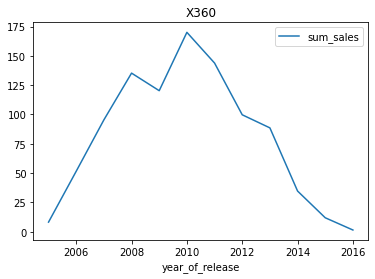

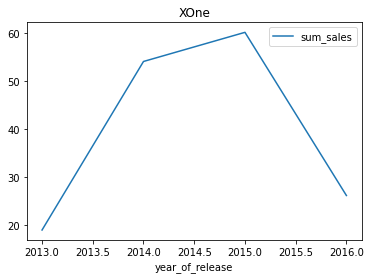

In [27]:
for name in platform_names:
    data_grouped_merged.loc[data_grouped_merged['platform']==name].plot(x='year_of_release', y='sum_sales', title=name);
    

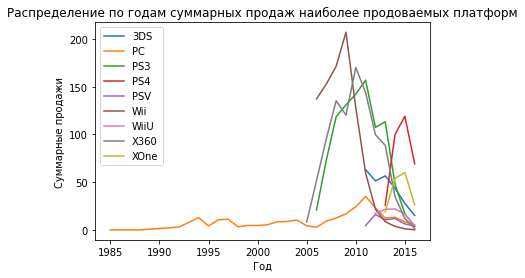

In [28]:
for name in platform_names:
    plt.plot('year_of_release', 'sum_sales', data=data_grouped_merged.loc[data_grouped_merged['platform']==name], label = name)

plt.xlabel("Год")
plt.ylabel("Суммарные продажи")
plt.legend()
plt.title('Распределение по годам суммарных продаж наиболее продоваемых платформ')
plt.show()

**Вывод:** к 2016 году почти у всех платформ заметен спад, это может быть связано с тем, что данные за 2016 год не полные, но надо посмотртеь еще лидеров по прадажам в 2016 году и те платформы, которые на рынке еще меньше 10 лет, чтобы понять какие платформы еще будут на рынке. 

In [29]:
data_grouped_merged.loc[data_grouped_merged['year_of_release']==2016,'sum_sales'].sort_values()

platform  year_of_release
Wii       2016                0.18
X360      2016                1.52
PS3       2016                3.60
PSV       2016                4.25
WiiU      2016                4.60
PC        2016                5.25
3DS       2016               15.14
XOne      2016               26.15
PS4       2016               69.25
Name: sum_sales, dtype: float64

По графикам видно, что платформы, которые на рынке меньше 10 лет XOne, WiiU, PSV, PS4, 3DS

**Вывод:** как можно заметить, лидирующие позиции по продажам в 2016 году занимают платформы 3DS, XOne, PS4, а у всех остальных платформ продажи более чем в 3 раза меньше. Также все они существуют на рынке меньше 10 лет. Скорее всего можем их считать потенционально прибыльными в следующем году.  
Если говорить именно про актуальный период, то я бы взяла 2013 - 2016, так как платформы в среднем живут 9-10 лет, а пик продаж приходится на первые 3-4 года. 

In [30]:
data_new=data.query('year_of_release>=2013')

In [31]:
data_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [32]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [33]:
data_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

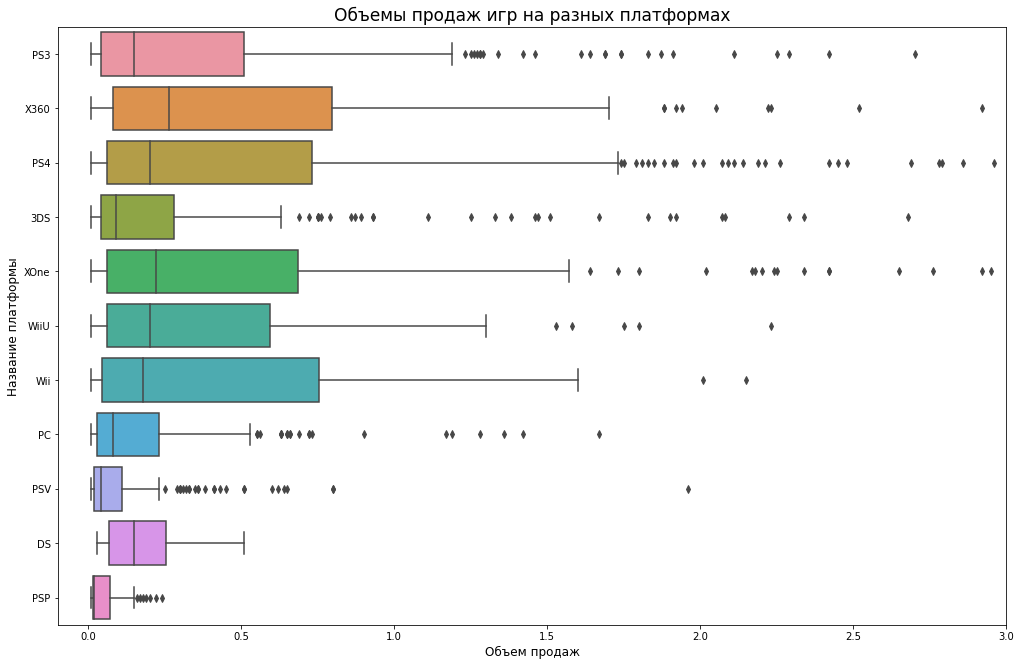

In [34]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_new, y='platform', x='sum_sales')
plt.xlim(-0.1, 3)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Возьмем самую продаваемую платформу в 2016 году - PS4 и посмотрем влияют ли на ее продажи отзывы пользователей и критиков.

In [35]:
data_PS4=data.query('platform=="PS4"')
data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [36]:
print(data_PS4['sum_sales'].corr(data_PS4['critic_score']))
print(data_PS4['sum_sales'].corr(data_PS4['user_score']))

0.406567902061781
-0.031957110204556376


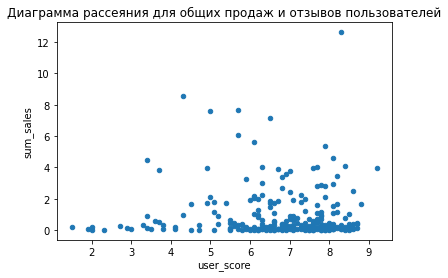

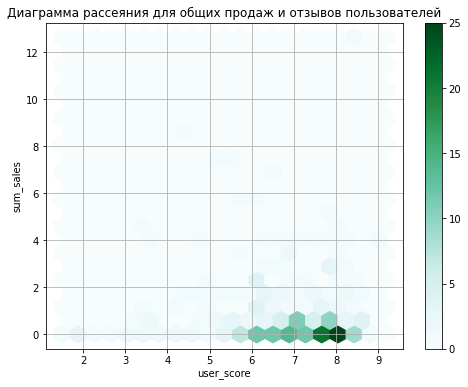

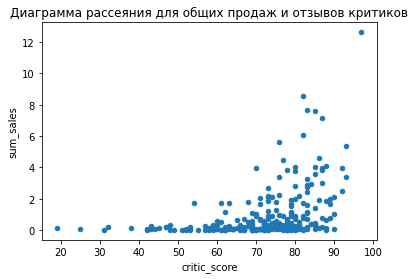

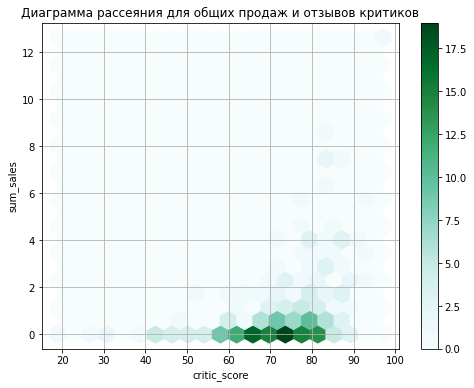

In [37]:
data_PS4.plot(x='user_score', y='sum_sales', kind='scatter', title='Диаграмма рассеяния для общих продаж и отзывов пользователей')
data_PS4.plot(x='user_score', y='sum_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Диаграмма рассеяния для общих продаж и отзывов пользователей'); 
data_PS4.plot(x='critic_score', y='sum_sales', kind='scatter', title='Диаграмма рассеяния для общих продаж и отзывов критиков')
data_PS4.plot(x='critic_score', y='sum_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Диаграмма рассеяния для общих продаж и отзывов критиков'); 



**Вывод:** при увеличеннии на 1 отзыва пользователя общие продажи увеличиваются на 0.41 миллиона, а при увеличении на 1 отзыва критика общие продажи уменьшаются на 0.03. По диаграммам рассеяния заметно, что больше всего наблюдений имеют оценку пользоватателей 8, но приэтом количсетво проданных копий до 1 миллиона. Похожая ситуация и с оценками критиков: больше всего наблюдений имеют оценку 75-85, но приэтом количсетво проданных копий до 1 миллиона. Однако, что по коэффициентам корреляции, что по графикам можно сказать, что связь достаточно слабая. 

In [38]:
for platform in data_new['platform'].unique():
    print(platform)
    data_platform = data_new.loc[data_new['platform']==platform]
    print(round(data_platform['sum_sales'].corr(data_platform['critic_score']),2))
    print(round(data_platform['sum_sales'].corr(data_platform['user_score']),2))
    print()


PS3
0.33
0.0

X360
0.35
-0.01

PS4
0.41
-0.03

3DS
0.36
0.24

XOne
0.42
-0.07

WiiU
0.38
0.42

Wii
nan
0.68

PC
0.2
-0.09

PSV
0.25
0.0

DS
nan
nan

PSP
nan
-1.0



/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Вывод:** по коэффициентам корреляции на всех платформах то же самое: связь слабая. Из-за этого, можно не рассматривать графики, так как чего-то интересного они показать не смогут. 

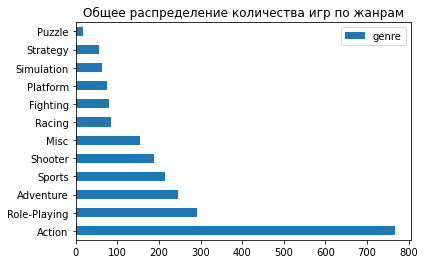

In [39]:
data_new.genre.value_counts().to_frame().plot(y = 'genre', kind = 'barh', title='Общее распределение количества игр по жанрам');

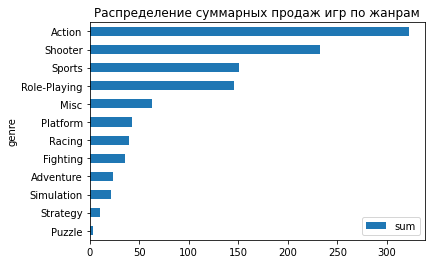

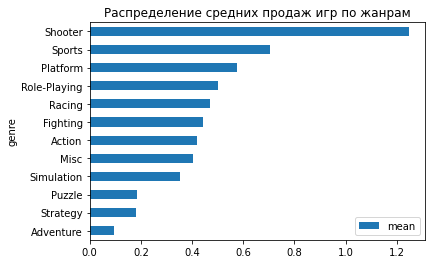

In [40]:
(
    data_new
    .groupby('genre')['sum_sales']
    .agg({'sum', 'mean'})
    .sort_values(by = 'sum', ascending = True).plot(y = 'sum', kind = 'barh', title='Распределение суммарных продаж игр по жанрам')
);
(
    data_new
    .groupby('genre')['sum_sales']
    .agg({'sum', 'mean'})
    .sort_values(by = 'mean', ascending = True).plot(y = 'mean', kind = 'barh', title='Распределение средних продаж игр по жанрам')
);

**Вывод:** самыми популярными жанрам являются Action и Role-Playing, а самыми прибыльными по сумме общих продаж являются Action и  Shooter, однако если смотреть на среднюю величину общих продаж, то лидируют Shooter и Platform. Жанр Puzzle имеет самую маленькую сумму общих продаж. 

## Портреты пользователей каждого региона

In [41]:
data_na=data_new.groupby('platform').agg({'na_sales':'sum'})
data_na.columns=['sum_na_sales']
sum1=data_new['na_sales'].sum()
data_na['persentage']=round(data_na['sum_na_sales']/sum1,2)
data_na.sort_values(by='sum_na_sales', ascending=False).head()

,sum_na_sales,persentage
platform,,
PS4,108.74,0.25
XOne,93.12,0.21
X360,81.66,0.19
PS3,63.50,0.15
3DS,38.20,0.09


In [42]:
data_na=data_new.groupby('genre').agg({'na_sales':'sum'})
data_na.columns=['sum_na_sales']
sum1=data_new['na_sales'].sum()
data_na['persentage']=round(data_na['sum_na_sales']/sum1,2)
data_na.sort_values(by='sum_na_sales', ascending=False).head()

,sum_na_sales,persentage
genre,,
Action,126.05,0.29
Shooter,109.74,0.25
Sports,65.27,0.15
Role-Playing,46.40,0.11
Misc,27.49,0.06


In [43]:
data_new['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [44]:
data_new.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()

,rating,na_sales
0,M,165.21
1,unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


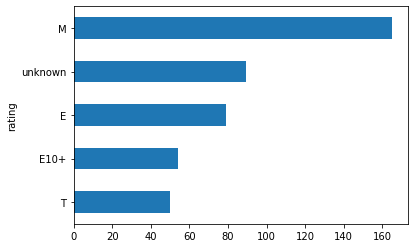

In [45]:
(
    data_new
    .groupby('rating')['na_sales']
    .agg('sum')
    .sort_values(ascending = True).plot(y = 'sum', kind = 'barh')
);

**Вывод:** Если анализировать продажи в Северной Америке, то можно сделать топ-5 платформ по сумме проданных копий и туда войдут X360, PS3,  PS4, XOne, 3DS. В сумме на них приходится 80% от общего количесства проданных копий в Северной Америке. Что же касается жанров, то в аналогичный топ-5 входят Action, Shooter, Sports, Role-Playing, Misc и на них приходится 83%. Очень много игр с оценкой M,а с оценкой Е, Е10+, Т и с отсутствием рейтинга ESRB почти в два раза меньше. А продаж игр с другими оценками почти нет, следовательно, мне кажется, что рейтинг все-таки влияет.

In [46]:
data_eu=data_new.groupby('platform').agg({'eu_sales':'sum'})
data_eu.columns=['sum_eu_sales']
sum2=data_new['eu_sales'].sum()
data_eu['persentage']=round(data_eu['sum_eu_sales']/sum2,2)
data_eu.sort_values(by='sum_eu_sales', ascending=False).head()

,sum_eu_sales,persentage
platform,,
PS4,141.09,0.36
PS3,67.81,0.17
XOne,51.59,0.13
X360,42.52,0.11
3DS,30.96,0.08


In [47]:
data_eu=data_new.groupby('genre').agg({'eu_sales':'sum'})
data_eu.columns=['sum_eu_sales']
sum2=data_new['eu_sales'].sum()
data_eu['persentage']=round(data_eu['sum_eu_sales']/sum2,2)
data_eu.sort_values(by='sum_eu_sales', ascending=False).head()

,sum_eu_sales,persentage
genre,,
Action,118.13,0.30
Shooter,87.86,0.22
Sports,60.52,0.15
Role-Playing,36.97,0.09
Racing,20.19,0.05


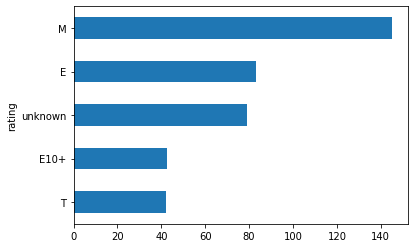

In [48]:
(
    data_new
    .groupby('rating')['eu_sales']
    .agg('sum')
    .sort_values( ascending = True).plot(y = 'sum', kind = 'barh')
);

In [49]:
data_new.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()


,rating,eu_sales
0,M,145.32
1,E,83.36
2,unknown,78.91
3,E10+,42.69
4,T,41.95


**Вывод:** Если анализировать продажи в Европе, то можно сделать топ-5 платформ по сумме проданных копий и туда войдут PS3,  X360, PS4, 3DS, PC. В сумме на них приходится 82% от общего количесства проданных копий в Европе. Что же касается жанров, то в аналогичный топ-5 входят Action, Shooter, Sports,  Role-Playing, Misc и на них приходится 78%. Очень много игр с оценкой M,а с оценкой Е, Е10+, Т и с отсутствием рейтинга ESRB почти в два раза меньше. А продаж игр с другими оценками почти нет, следовательно, мне кажется, что рейтинг все-таки влияет.

In [50]:
data_jp=data_new.groupby('platform').agg({'jp_sales':'sum'})
data_jp.columns=['sum_jp_sales']
sum3=data_new['jp_sales'].sum()
data_jp['persentage']=round(data_jp['sum_jp_sales']/sum3,2)
data_jp.sort_values(by='sum_jp_sales', ascending=False).head()

,sum_jp_sales,persentage
platform,,
3DS,67.81,0.48
PS3,23.35,0.17
PSV,18.59,0.13
PS4,15.96,0.11
WiiU,10.88,0.08


In [51]:
data_jp=data_new.groupby('genre').agg({'jp_sales':'sum'})
data_jp.columns=['sum_jp_sales']
sum3=data_new['jp_sales'].sum()
data_jp['persentage']=round(data_jp['sum_jp_sales']/sum3,2)
data_jp.sort_values(by='sum_jp_sales', ascending=False).head()

,sum_jp_sales,persentage
genre,,
Role-Playing,51.04,0.36
Action,40.49,0.29
Misc,9.20,0.07
Fighting,7.65,0.05
Shooter,6.61,0.05


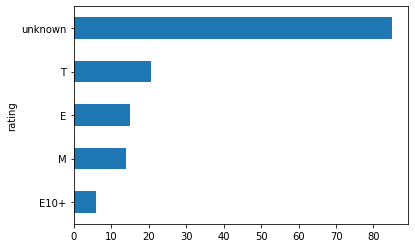

In [52]:
(
    data_new
    .groupby('rating')['jp_sales']
    .agg('sum')
    .sort_values( ascending = True).plot(y = 'sum', kind = 'barh')
);

In [53]:
data_new.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()


,rating,jp_sales
0,unknown,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


**Вывод:** Если анализировать продажи в Японии, то можно сделать топ-5 платформ по сумме проданных копий и туда войдут 3DS, PS3,  PSP, PSV, WiiU. В сумме на них приходится 86% от общего количесства проданных копий в Европе. Что же касается жанров, то в аналогичный топ-5 входят Role-Playing, Action, Misc, Platform, Fighting и на них приходится 74%. Очень много игр с отсутвующей оценкой, а с оценкой Е, M, Т и с отсутствием рейтинга ESRB почти в три раза меньше. А продаж игр с другими оценками почти нет. Так как, очень много игр с отсуствием оценки, то можно предположить, что данный рейтинг не сильно влияет на продажи в Японии.

**Общий вывод пункта 4:** Топ-5 платформ достаточно сильно совпадают в Европе и в Северной Америке,а топ-5 почти полностью. А вот Япония сильно отличается от них. Стоит отметить, что в Японии первое место в распределении продаж по жанрам занимает Role-Playing, 32% от всех продаж. Рейтинг ESPB может оказывать влияние на продажи в Северной Америке и Европе, а вот в Японии слшком много пропусков, так что на продажи в этом регионе может не влиять рейтинг.  

## Проверка гипотез

In [54]:
data_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [55]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 291.3+ KB


In [56]:
data_full=data_new.dropna(subset=['user_score'])

**Н0:** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Н1:** Средние пользовательские рейтинги платформ Xbox One и PC не равны
   
Пусть уровень значимости 𝛼=0,05

In [57]:
results = st.ttest_ind(data_full[data_full['platform'] =='XOne']['user_score'],data_full[data_full['platform'] =='PS']['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


nan
Не получилось отвергнуть нулевую гипотезу


**Пояснение:** использовала функцию ttest_ind, так как надо было проверить гипотезу на равенство средних двух независимых выборок, равенство дисперсий не предполагается. 

**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC не равны

**Н0:** Средние пользовательские рейтинги жанров Action и Sports равны

**Н1:** Средние пользовательские рейтинги жанров Action и Sports не равны
   
Пусть уровень значимости 𝛼=0,05

In [58]:
results = st.ttest_ind(data_full[data_full['genre'] =='Action']['user_score'],data_full[data_full['genre'] =='Sports']['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Пояснение:** использовала функцию ttest_ind, так как надо было проверить гипотезу на равенство средних двух независимых выборок, равенство дисперсий не предполагается. 

**Вывод:** Средние пользовательские рейтинги жанров Action и Sports равны

## Общий вывод

В заключение, хотелось бы сказать, что потенциально существующими и достаточно прибыльными в следующем году могут быть платформы 3DS, XOne, PS4. Самый популярными жанрамы видео игр являются Action и Sports. Эти жанры лидируют не только по общим продажам, но и по продажам в Северной Америке и Европе, а вот в Японии перед этими жанрыми оказывается Role-Playing. Также стоит отметить, что у этих двух жанров равны и пользоватьские рейтинги. Говоря про рейтинг пользователей и критиков, был сделан вывод, что связь между ними и суммарными продажами достаточно слабая. 